In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('BBC.csv')

In [3]:
data.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,5,1,90000,2,0,5,1,0,2,2,50,1
1,5,1,60000,3,3,5,0,1,1,2,51,1
2,5,1,60000,3,3,5,1,1,5,2,51,1
3,5,2,70000,0,0,5,0,1,10,2,49,1
4,5,2,80000,5,5,5,1,4,2,2,48,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
MaritalStatus           18484 non-null int64
Gender                  18484 non-null int64
YearlyIncome            18484 non-null int64
TotalChildren           18484 non-null int64
NumberChildrenAtHome    18484 non-null int64
EnglishEducation        18484 non-null int64
HouseOwnerFlag          18484 non-null int64
NumberCarsOwned         18484 non-null int64
CommuteDistance         18484 non-null int64
Region                  18484 non-null int64
Age                     18484 non-null int64
BikeBuyer               18484 non-null int64
dtypes: int64(12)
memory usage: 1.7 MB


In [5]:
data.describe()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,3.310106,1.494103,57305.777970,1.844352,1.004058,3.310106,0.676369,1.502705,6.003246,1.789710,54.603928,0.494049
std,1.426147,0.499979,32285.841703,1.612408,1.522660,1.426147,0.467874,1.138394,6.382562,0.872664,11.255252,0.499978
min,1.000000,1.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,36.000000,0.000000
25%,2.000000,1.000000,30000.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,46.000000,0.000000
50%,3.000000,1.000000,60000.000000,2.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,53.000000,0.000000
75%,5.000000,2.000000,70000.000000,3.000000,2.000000,5.000000,1.000000,2.000000,10.000000,3.000000,62.000000,1.000000
max,5.000000,2.000000,170000.000000,5.000000,5.000000,5.000000,1.000000,4.000000,20.000000,3.000000,106.000000,1.000000


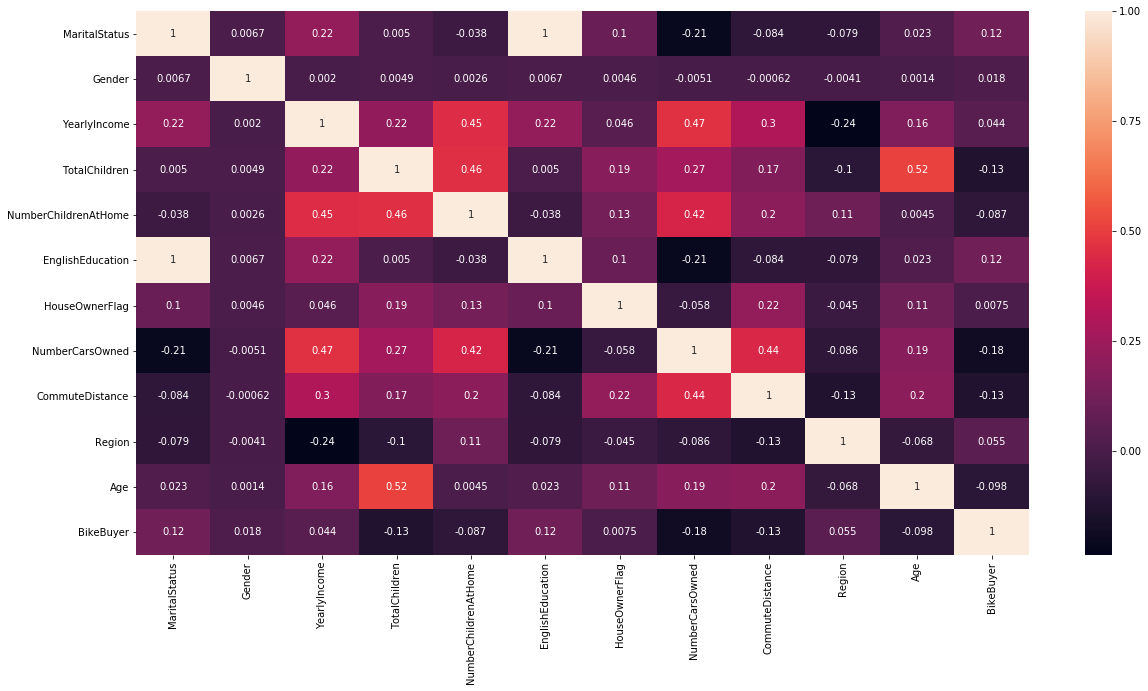

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

## modeling

In [24]:
fiture = data[['MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'CommuteDistance', 'Region', 'Age']]
target = data['BikeBuyer']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(fiture,target,test_size=0.3,)

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [20]:
xgb = XGBClassifier(max_depth=5,learning_rate=0.30)
xgb.fit(X_train,y_train)
predict = xgb.predict(X_test)
predictProb = xgb.predict_proba(X_test)

In [21]:
from sklearn.metrics import classification_report, matthews_corrcoef,roc_auc_score, confusion_matrix, accuracy_score
def reporting(y_test, predict, predictpro):
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))
    print('matthews corr : ', matthews_corrcoef(y_test, predict))
    print('ROC AUC Score : ', roc_auc_score(y_test, predictpro))
    print('Accuracy Score : ', accuracy_score(y_test, predict))

In [22]:
reporting(y_test,predict, predictProb[:,1])

[[2140  599]
 [ 569 2238]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2739
           1       0.79      0.80      0.79      2807

   micro avg       0.79      0.79      0.79      5546
   macro avg       0.79      0.79      0.79      5546
weighted avg       0.79      0.79      0.79      5546

matthews corr :  0.5787101881397382
ROC AUC Score :  0.8584725272824303
Accuracy Score :  0.7893977641543455


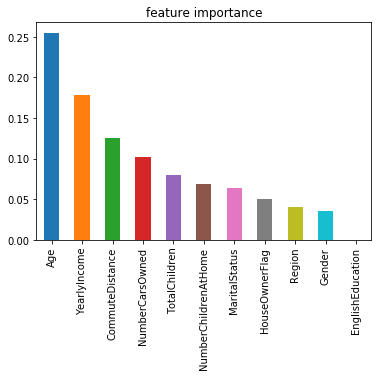

In [23]:
coef1 = pd.Series(xgb.feature_importances_, fiture.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='feature importance')

[[0.79559937 0.76806541 0.748467   0.7538776  0.75940844 0.7454611
  0.7454611  0.7454611  0.7454611  0.7454611 ]
 [0.79559446 0.77039246 0.75750289 0.74769142 0.75144286 0.76596768
  0.75740669 0.75740669 0.75740669 0.75740669]
 [0.79839679 0.77739479 0.76601202 0.75823647 0.76016032 0.75679359
  0.7604008  0.75823647 0.75823647 0.75823647]
 [0.80836883 0.78631304 0.7703037  0.7674866  0.76803628 0.76357015
  0.76398241 0.76137144 0.76219596 0.76219596]
 [0.8088253  0.79403631 0.78381628 0.7788265  0.78105086 0.77582061
  0.77527955 0.77101118 0.77293495 0.77155224]]


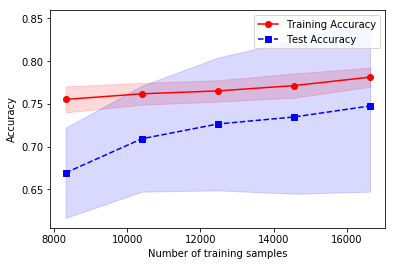

In [79]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=xgb,
                                                       X=fiture,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()